In [62]:
import numpy as np
from matplotlib import pyplot as plt
import csv

%matplotlib inline

import lib_ecofun as lef
from importlib import reload
reload(lef)
from scipy.optimize import curve_fit, minimize

# Recover old result

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
0.003408921792197812


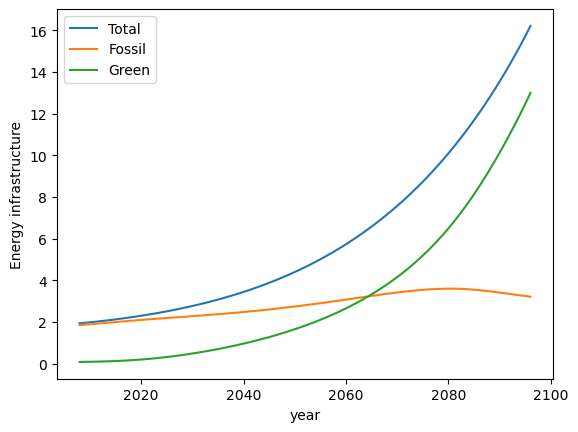

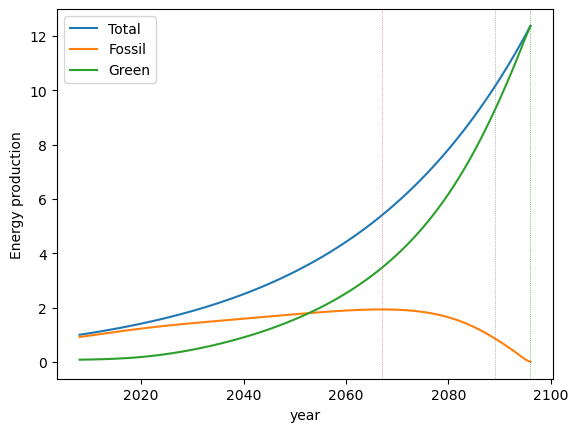

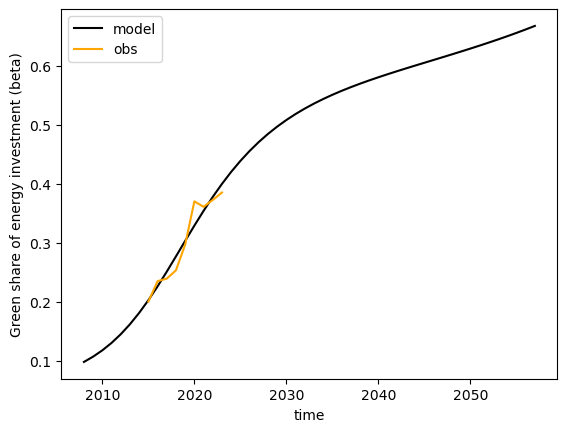

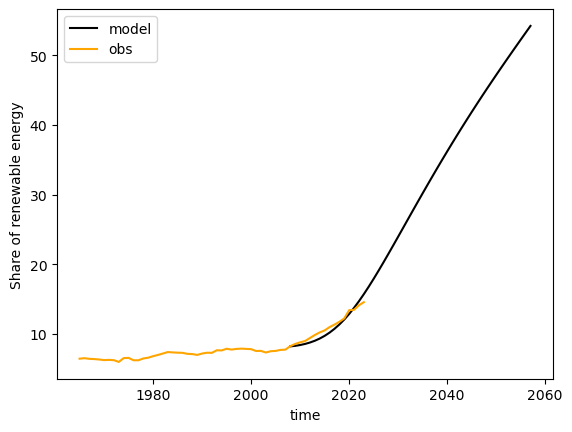

In [63]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
oks = [-1.381e-01, 1.095e-01, 9.961e-01, 2.124e-01]

for par, parval in zip(parnames, oks):
    params[par] = parval

resu_old = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008, extend_constant=False)
lef.plot_resu(resu_old, year_ini = 2008)
lef.plot_resuvsobs(resu_old, year_ini = 2008)

obs = dict()
obs['Ig_ratio'] = lef.Ig_obs/(lef.Ig_obs+lef.If_obs)
obs['Eg_ratio'] = lef.Eg_ratio/100.
cost = lef.costfun(resu_old, obs)#, weights = weights)
print(cost)


# Starting point of minimize

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
1930.092873297028


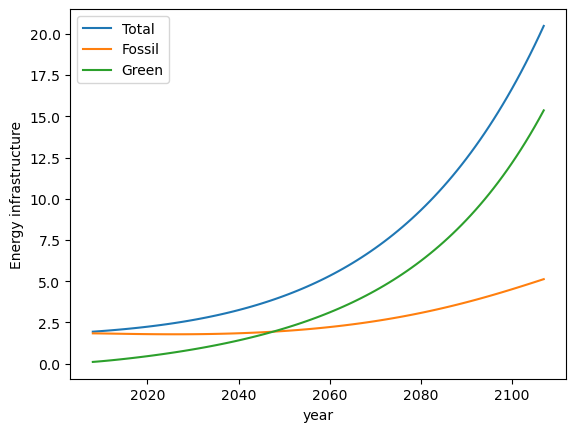

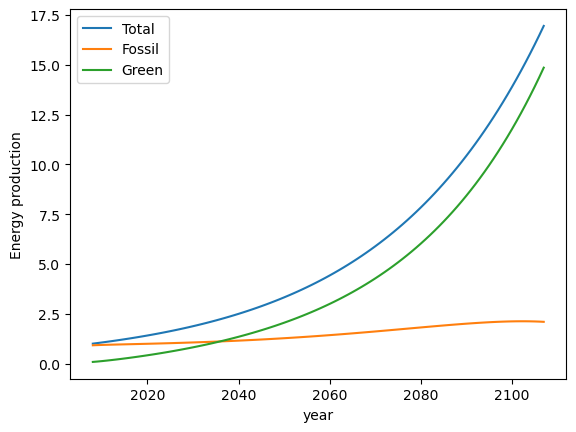

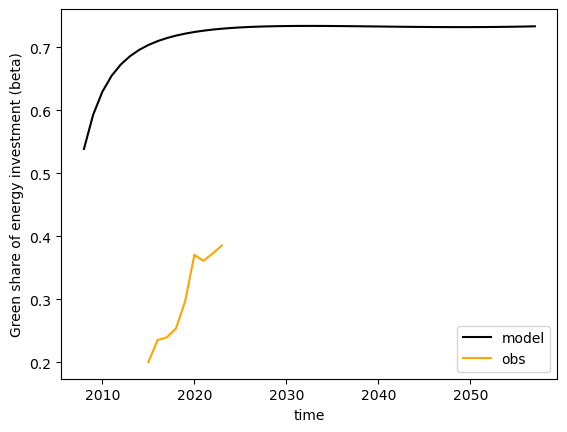

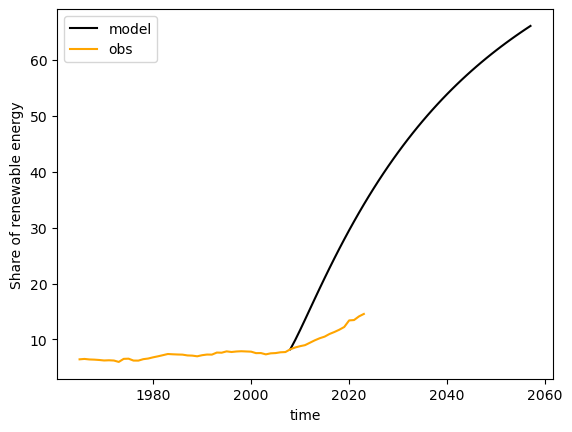

In [65]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
#oks = [-1.381e-01, 1.095e-01, 9.961e-01, 2.124e-01]
oks = [0.2, 0.1, 1., 0.7]

for par, parval in zip(parnames, oks):
    params[par] = parval

resu = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008, extend_constant=False)
lef.plot_resu(resu, year_ini = 2008)
lef.plot_resuvsobs(resu, year_ini = 2008)

obs = dict()
obs['Ig_ratio'] = lef.Ig_obs/(lef.Ig_obs+lef.If_obs)
obs['Eg_ratio'] = lef.Eg_ratio/100.
cost = lef.costfun(resu, obs)#, weights = weights)
print(cost)

## Best fit with obs. Ig_ratio (2015-2023) and Eg_ratio (2008-2023). 2008 starting point (could be earlier)

In [66]:
parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
initial_guess = [0.2, 0.1, 1., 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.01, 0.4), (0.5, 1.5), (0.2, 2.)]#, (0.5, 1.5)]

params = lef.default_params.copy()
print(params)
print('-------------')
params['growth'] = 0.029 # fixing Growth!

# Step 5: Use an optimization function to find the best parameters
result = minimize(lef.cost_function, initial_guess, bounds = bounds, args = (parnames, params, 2008, lef.inicond_yr(2008), False), tol = 1e-10)
print(result)

{'growth': 0.01, 'eps': 1, 'a': 1, 'b': 1, 'gamma_f': 0.5, 'gamma_g': 0.5, 'eta_g': 0.2, 'eta_f': 0.2, 'h_g': 0.5, 'h_f': 0.5, 'r_inv': 0.1, 'beta_0': 0.2, 'delta_sig': 0.5, 'delta_g': 0.01, 'delta_f': 0.01, 'f_heavy': 0.1}
-------------
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.20000001, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.10000001, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.00000001, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.70000001}
---------------------
{'beta_0': -0.5, 'r_inv': 0.01, 'a': 0.5, 'delta_sig': 2.0}
---------------------
{'beta_0': -0.49999999, 'r_inv': 0.01, 'a': 0.5, 'delta_sig': 2.0}
---------------------
{'beta_0': -0.5, 'r_inv': 0.01000001, 'a': 0.5, 'delta_sig': 2.0}
---------------------
{'beta_0': -0.5, 'r_inv': 0.01, 'a': 0.50000001, 'del

In [69]:
obs

{'Ig_ratio': <xarray.DataArray (year: 9)>
 array([0.20060606, 0.23529412, 0.23959044, 0.25370121, 0.2972973 ,
        0.37059265, 0.36128581, 0.37296621, 0.38560562])
 Coordinates:
   * year     (year) int64 2015 2016 2017 2018 2019 2020 2021 2022 2023,
 'Eg_ratio': <xarray.DataArray (year: 59)>
 array([ 6.445519 ,  6.516204 ,  6.423987 ,  6.3901453,  6.32996  ,
         6.2402315,  6.2751184,  6.231038 ,  5.98148  ,  6.527657 ,
         6.5613737,  6.2220235,  6.216026 ,  6.4746337,  6.5883255,
         6.8036585,  6.9859357,  7.1871624,  7.3960943,  7.3479614,
         7.309479 ,  7.2850266,  7.1429477,  7.10847  ,  6.9876184,
         7.182692 ,  7.301195 ,  7.2864876,  7.6539183,  7.6321683,
         7.8718243,  7.755703 ,  7.847491 ,  7.890869 ,  7.8530593,
         7.8158455,  7.552836 ,  7.5668545,  7.3342075,  7.518    ,
         7.5638204,  7.705343 ,  7.7473364,  8.245706 ,  8.564856 ,
         8.797048 ,  8.980997 ,  9.414955 ,  9.847355 , 10.218171 ,
        10.504495 , 10.

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
1969.1504761091076


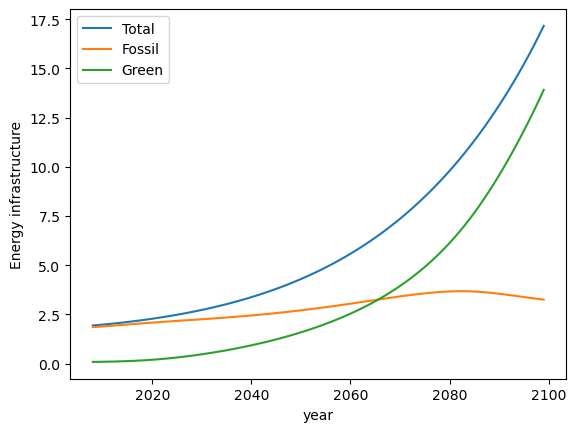

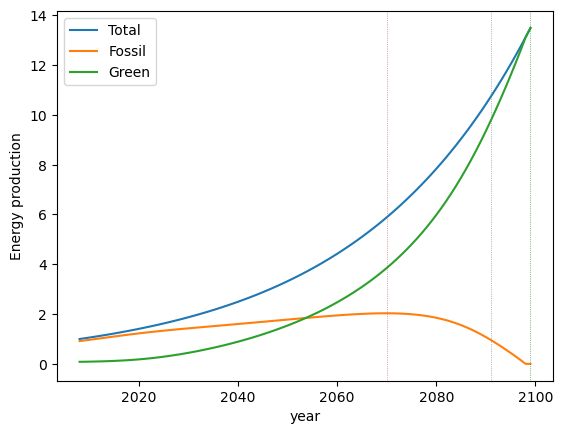

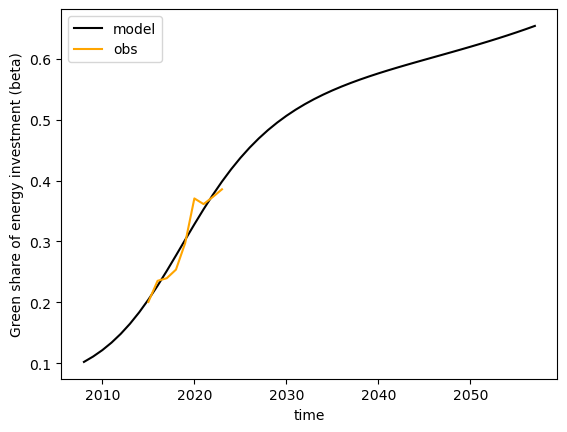

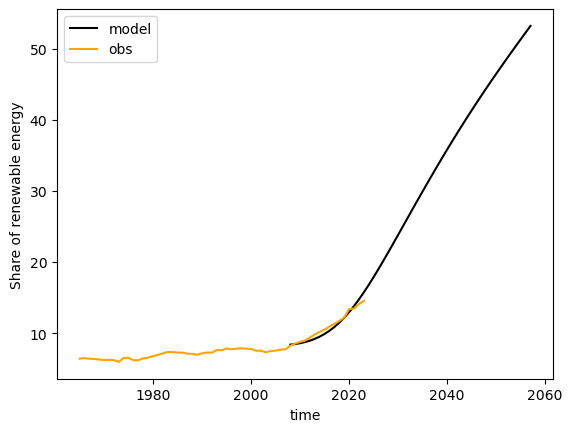

In [68]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

for par, parval in zip(parnames, result.x):
    params[par] = parval

resu = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008)
lef.plot_resu(resu, year_ini = 2008)
lef.plot_resuvsobs(resu, year_ini = 2008)

yini = 2008
#print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

cost = lef.costfun(resu, obs)#, weights = weights)
print(cost)

In [9]:
lef.Ig_obs_all

<xarray.DataArray (year: 9)>
array([1074., 1132., 1129., 1137., 1225., 1259., 1408., 1617., 1740.])
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 2020 2021 2022 2023

In [12]:
resu['Ig_ratio']-lef.Ig_obs_all

<xarray.DataArray (year: 0)>
array([], dtype=float64)
Coordinates:
  * year     (year) int64